In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Tarefa 4 - Decision Trees, Random Forest and K-Means
Fourth assessed coursework for the course: Técnicas e Algoritmos em Ciência de Dados

This tarefa provides an exciting opportunity for students to put their knowledge acquired in class into practice, using decision trees and random forests to solve a real-world problem in classification and delve into the world of unsupervised learning by implementing the K-means algorithm. Students will also get used to generating important plots during training to analyse the models' behaviour. 

## General guidelines:

* This work must be entirely original. You are allowed to research documentation for specific libraries, but copying solutions from the internet or your classmates is strictly prohibited. Any such actions will result in a deduction of points for the coursework.
* Before submitting your work, make sure to rename the file to the random number that you created for the previous coursework (for example, 289479.ipynb).

## Notebook Overview:

1. [Decision Trees](#Decision_Trees) (30%)
2. [Random Forest](#Random_Forest) (30%)
3. [K-Means](#K-Means) (30%)

### Decision_Trees
## Part 1 - Decision Trees for Classification (value: 30%)

In [2]:
# load the data
ddi_df = pd.read_csv('ddi_dt_sample.csv')

In [3]:
# inspect the data
ddi_df

,drug1,drug2,ddi,pca_max_0,pca_max_1,pca_max_2,pca_max_3,pca_max_4,pca_max_5,pca_max_6,...,pca_min_17,pca_min_18,pca_min_19,pca_min_20,pca_min_21,pca_min_22,pca_min_23,pca_min_24,pca_min_25,pca_min_26
0,CID000002725,CID000013342,0.0,-2.383210,-0.066904,0.051153,0.058145,0.398508,0.215271,-0.267814,...,-0.366350,-1.091191,-1.021989,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.091330,-0.195522
1,CID000002802,CID000013342,0.0,-2.554958,-0.066904,0.053715,0.058145,0.398508,0.131852,-0.267814,...,-0.366350,0.106596,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
2,CID000002083,CID000013342,0.0,9.908402,-0.066904,0.122384,0.058145,0.398508,0.098734,0.041276,...,-0.366350,0.102901,0.010149,-0.088365,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
3,CID000004034,CID000013342,0.0,-2.547375,-0.066904,0.051884,0.058145,0.398508,0.203962,-0.267814,...,-0.366350,-1.011102,-0.944133,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
4,CID000003899,CID000013342,0.0,-2.554958,-0.066904,0.051083,0.058145,0.398508,0.138126,-0.267814,...,-0.366350,0.075010,0.010149,-0.086979,-0.326333,-0.179530,-0.162906,-0.204593,-0.080100,-0.195522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,CID000002083,CID000002160,1.0,10.213277,-0.355555,0.122384,0.024324,0.144197,0.286870,0.041276,...,-0.743211,-0.148822,0.030291,-0.088365,-0.131963,0.010439,0.014404,-0.130975,0.003776,-0.043334
776,CID000002088,CID000002160,1.0,10.213277,-0.355555,0.048850,-0.064623,0.097114,0.286870,-0.235796,...,-0.743211,-0.148822,0.041925,-0.106078,-0.131963,0.157741,-0.055455,-0.130975,-0.030832,-0.053976
777,CID000001206,CID000002160,0.0,10.213277,-0.355555,-0.210680,-0.646083,-0.111940,0.290024,-0.235796,...,-1.269156,-0.148822,0.259326,-0.247741,-0.193907,0.076300,0.023777,-0.130975,0.006320,-0.070912
778,CID000002118,CID000002160,1.0,10.213277,-0.355555,0.062143,-0.017338,0.059182,0.286870,-0.235796,...,-0.743211,-0.148822,0.059779,-0.072749,-0.131963,0.077367,0.026625,-0.130975,-0.021027,-0.047147


As you can observe, the first 2 columns represent the IDs of the drugs in each combination. The 3rd column represents the binary label indicating if the pair causes an adverse interaction or not. The remaining 54 columns are the features based on the PCA representations of individual drug targets. 

In [4]:
# Separando os recursos (features) e o alvo (target)
X = ddi_df.drop(columns=['ddi']).values
y = ddi_df['ddi'].values

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
class DecisionTreeClassifier:
    def __init__(self, max_depth=4, min_samples_leaf=15):
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.tree = None
    
    def entropy(self, y):
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])
    
    def information_gain(self, y, y_left, y_right):
        p = float(len(y_left)) / (len(y_left) + len(y_right))
        return self.entropy(y) - p * self.entropy(y_left) - (1 - p) * self.entropy(y_right)
    
    def best_split(self, X, y):
        best_gain = 0
        best_feature = None
        best_value = None
        n_features = X.shape[1]
        
        for feature in range(n_features):
            values = X[:, feature]
            unique_values = np.unique(values)
            for value in unique_values:
                left_mask = values <= value
                right_mask = values > value
                y_left, y_right = y[left_mask], y[right_mask]
                
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                
                gain = self.information_gain(y, y_left, y_right)
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_value = value
        
        return best_feature, best_value, best_gain
    
    def build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        if (depth >= self.max_depth or n_samples < self.min_samples_leaf or n_labels == 1):
            leaf_value = np.bincount(y).argmax()
            return {'leaf': leaf_value}
        
        feature, value, gain = self.best_split(X, y)
        
        if gain == 0:
            leaf_value = np.bincount(y).argmax()
            return {'leaf': leaf_value}
        
        left_mask = X[:, feature] <= value
        right_mask = X[:, feature] > value
        
        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return {'feature': feature, 'value': value, 'left': left_subtree, 'right': right_subtree}
    
    def fit(self, X, y):
        self.tree = self.build_tree(X, y)
    
    def predict_sample(self, sample, tree):
        if 'leaf' in tree:
            return tree['leaf']
        
        feature = tree['feature']
        value = tree['value']
        
        if sample[feature] <= value:
            return self.predict_sample(sample, tree['left'])
        else:
            return self.predict_sample(sample, tree['right'])
    
    def predict(self, X):
        return [self.predict_sample(sample, self.tree) for sample in X]

In [8]:
def manual_k_fold_cross_validation(X, y, k, max_depth_values, min_samples_leaf=15):
    best_depth = None
    best_score = 0
    
    fold_size = len(X) // k
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    for max_depth in max_depth_values:
        scores = []
        for i in range(k):
            val_indices = indices[i*fold_size:(i+1)*fold_size]
            train_indices = np.concatenate([indices[:i*fold_size], indices[(i+1)*fold_size:]])
            
            X_train, X_val = X[train_indices], X[val_indices]
            y_train, y_val = y[train_indices], y[val_indices]
            
            tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            tree.fit(X_train, y_train)
            predictions = tree.predict(X_val)
            score = accuracy_score(y_val, predictions)
            scores.append(score)
        
        mean_score = np.mean(scores)
        
        if mean_score > best_score:
            best_score = mean_score
            best_depth = max_depth
    
    return best_depth, best_score

In [19]:
# Garantir que os rótulos sejam inteiros
y = y.astype(int)

# Realizamos a validação cruzada
max_depth_values = [4, 6, 8]
k = 3
best_depth, best_score = manual_k_fold_cross_validation(X, y, k, max_depth_values)

print(f'Melhor profundidade: {best_depth}, Acurácia média na validação cruzada: {best_score}')

# Treinamos a árvore de decisão com os melhores parâmetros usando todo o conjunto de treinamento
tree = DecisionTreeClassifier(max_depth=best_depth, min_samples_leaf=15)
tree.fit(X, y)

# Avaliamos no conjunto de teste
predictions_test = tree.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
roc_auc_test = roc_auc_score(y_test, predictions_test)

print(f'Acurácia no conjunto de teste: {accuracy_test}, AUROC no conjunto de teste: {roc_auc_test}')

Melhor profundidade: 6, Acurácia média na validação cruzada: 0.7935897435897435
Acurácia no conjunto de teste: 0.8717948717948718, AUROC no conjunto de teste: 0.8768472906403942


## Random_Forest
## Part 2 - Random Forest for Classification Networks (value: 30%)



In [20]:
# Dividir o conjunto de dados em treino (80%), validação (10%) e teste (10%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, random_state=42)  # 0.1111 * 0.9 = 0.1

import numpy as np

class RandomForestClassifier:
    def __init__(self, n_trees=15, max_depth=10, min_samples_leaf=15, num_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.num_features = num_features
        self.trees = []
    
    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]
    
    def fit(self, X, y):
        self.trees = []
        if self.num_features is None:
            self.num_features = int(np.sqrt(X.shape[1]))
        
        for _ in range(self.n_trees):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_predictions = np.swapaxes(tree_predictions, 0, 1)  # Transpor para alinhamento correto
        return [np.bincount(tree_preds).argmax() for tree_preds in tree_predictions]

from sklearn.metrics import roc_auc_score

def evaluate_forest_performance(X_train, y_train, X_val, y_val, n_trees_values, max_depth=10, min_samples_leaf=15):
    best_n_trees = None
    best_score = 0
    
    for n_trees in n_trees_values:
        forest = RandomForestClassifier(n_trees=n_trees, max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        forest.fit(X_train, y_train)
        predictions = forest.predict(X_val)
        score = roc_auc_score(y_val, predictions)
        
        if score > best_score:
            best_score = score
            best_n_trees = n_trees
    
    return best_n_trees, best_score

# Realizamos a validação cruzada para encontrar o melhor número de árvores
n_trees_values = [10, 15, 20, 25, 30]
best_n_trees, best_roc_auc = evaluate_forest_performance(X_train, y_train, X_val, y_val, n_trees_values)

print(f'Melhor número de árvores: {best_n_trees}, Melhor AUROC na validação: {best_roc_auc}')


Melhor número de árvores: 30, Melhor AUROC na validação: 0.8069767441860466


In [21]:
# Treinamos a floresta aleatória com o melhor número de árvores usando o conjunto de treinamento completo (treinamento + validação)
forest = RandomForestClassifier(n_trees=best_n_trees, max_depth=10, min_samples_leaf=15)
forest.fit(X_train_full, y_train_full)

# Avaliamos no conjunto de teste
predictions_test = forest.predict(X_test)
accuracy_test = accuracy_score(y_test, predictions_test)
roc_auc_test = roc_auc_score(y_test, predictions_test)

print(f'Acurácia no conjunto de teste: {accuracy_test}, AUROC no conjunto de teste: {roc_auc_test}')

# Avaliação da árvore de decisão já treinada
tree_predictions_test = tree.predict(X_test)
tree_accuracy_test = accuracy_score(y_test, tree_predictions_test)
tree_roc_auc_test = roc_auc_score(y_test, tree_predictions_test)

print(f'Acurácia da Árvore de Decisão no conjunto de teste: {tree_accuracy_test}, AUROC: {tree_roc_auc_test}')
print(f'Acurácia da Floresta Aleatória no conjunto de teste: {accuracy_test}, AUROC: {roc_auc_test}')


Acurácia no conjunto de teste: 0.8589743589743589, AUROC no conjunto de teste: 0.866643209007741
Acurácia da Árvore de Decisão no conjunto de teste: 0.8717948717948718, AUROC: 0.8768472906403942
Acurácia da Floresta Aleatória no conjunto de teste: 0.8589743589743589, AUROC: 0.866643209007741


## K-Means
## Part 3 – Clustering with K-means (value: 40%)

In this exercise, you will explore clustering by implementing the K-means algorithm. You will write code to perform K-means clustering while visualizing the movement of the centroids at each iteration. 

To complete this exercise, you will write code to implement K-means for clustering: 

1. Dataset Preparation: Run the cells provided in the notebook that generate the artificial data points for this exercise.
2. K-means Clustering:
	- Initialize K cluster centroids by selecting K points from your dataset at random.
	- Implement a loop to perform the following steps until convergence (or until a specified maximum number of iterations is reached, e.g., 150):
        - Assign each data point to the nearest centroid (you will have to calculate the Euclidean distance between the data point and each centroid).
        - Update each centroid by moving it to the mean of all data points assigned to it.
        - Check for convergence by comparing the new centroids with the previous centroids. If the difference is smaller than an $\epsilon=1^{-4}$, exit the loop.
3. Centroid Movement Visualization:
	- At 5 different moments during training, plot a figure showing the centroids and the points. Figure 1 should show the situation at the beginning, before learning. Figure 5 should show the situation at the end of the learning. The remaining Figures 2-4 should show intermediary situations.
	- For each figure, each centroid will be represented by a large black cross and each cluster with a different colour, the points must be coloured according to their respective cluster.
4. Sum of squared distances:
	- Along with plotting the centroid movement, calculate the sum of squared distances at each iteration as follows:
        - $\sum_{j=1}^K \sum_{n \in S_j}d(x_n,\mu_j )^2$, where $K$ is the number of clusters, $x_n$ represents the $n^{th}$ datapoint, $n \in S_j$ indicates a set of points that belong to cluster $S_j$, $\mu_j$ is the mean of the datapoints in $S_j$ and $d(x_n,\mu_j)$ indicates the Euclidean distance between $x_n$ and $\mu_j$.
	- Make a plot of the sum of squared distances at each iteration. 


In [ ]:
# Generate artificial data points
np.random.seed(13)
num_samples = 200
num_features = 2
X = np.random.randn(num_samples, num_features) * 1.5 + np.array([[2, 2]])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 3 + np.array([[-5, -5]])])
X = np.concatenate([X, np.random.randn(num_samples, num_features) * 2 + np.array([[7, -5]])])

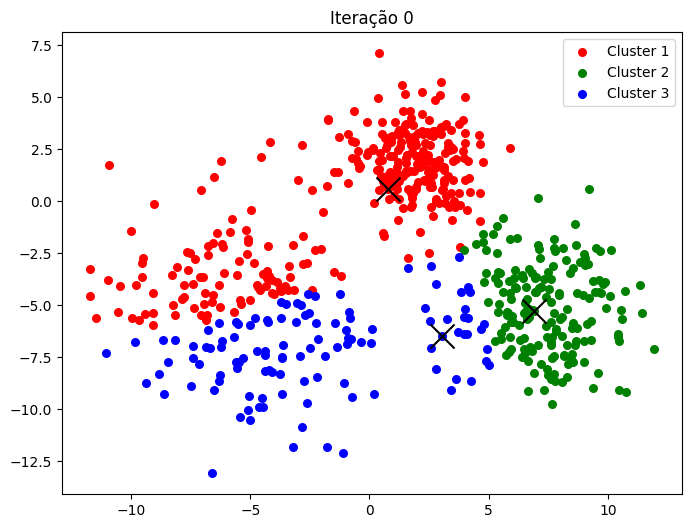

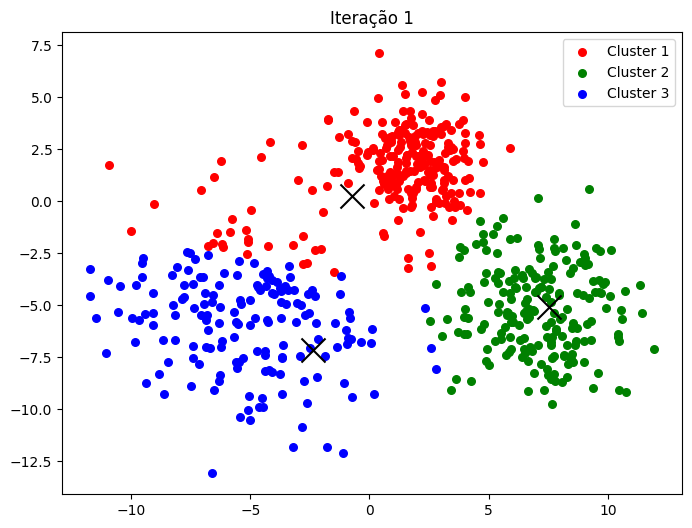

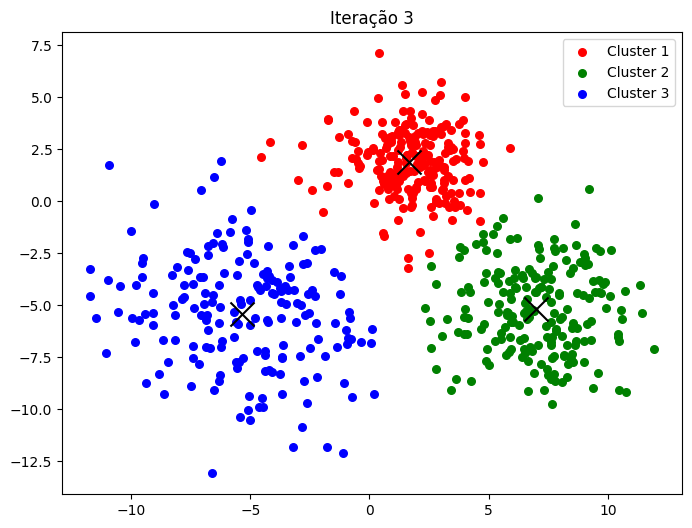

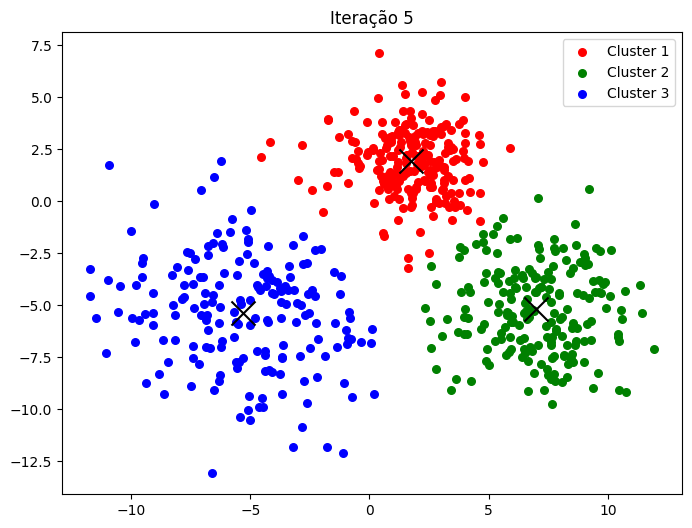

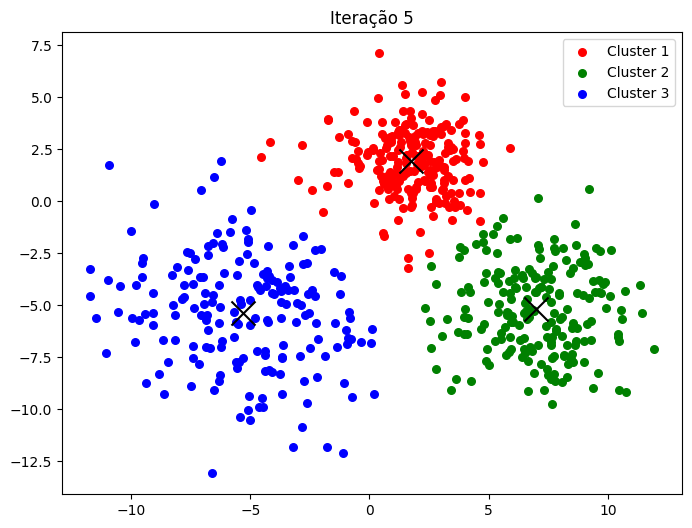

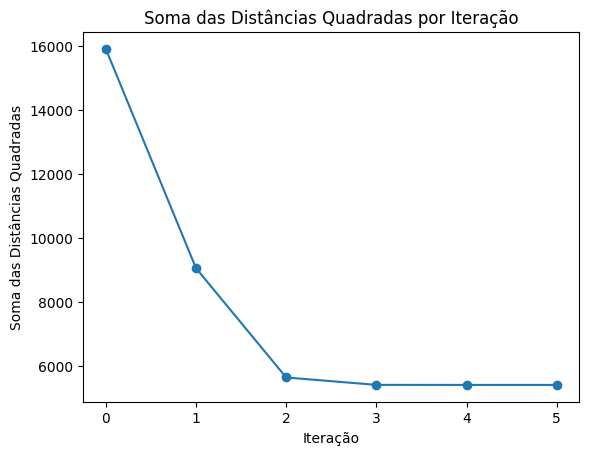

In [22]:
# Gerar dados artificiais
np.random.seed(13)
num_samples = 200
num_features = 2

# Cluster 1
X1 = np.random.randn(num_samples, num_features) * 1.5 + np.array([[2, 2]])
# Cluster 2
X2 = np.random.randn(num_samples, num_features) * 3 + np.array([[-5, -5]])
# Cluster 3
X3 = np.random.randn(num_samples, num_features) * 2 + np.array([[7, -5]])

# Concatenar todos os pontos
X = np.concatenate([X1, X2, X3])

# Funções para K-means
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def compute_distances(X, centroids):
    distances = np.zeros((X.shape[0], len(centroids)))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        new_centroids[i] = X[labels == i].mean(axis=0)
    return new_centroids

def kmeans(X, k, max_iters=150, tol=1e-4):
    centroids = initialize_centroids(X, k)
    centroids_history = [centroids]
    for i in range(max_iters):
        distances = compute_distances(X, centroids)
        labels = np.argmin(distances, axis=1)
        new_centroids = update_centroids(X, labels, k)
        centroids_history.append(new_centroids)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels, centroids_history

# Definindo o número de clusters
k = 3
centroids, labels, centroids_history = kmeans(X, k)

# Função para plotar o progresso do K-means
def plot_kmeans_progress(X, centroids_history, labels, iteration):
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    for i, centroid in enumerate(centroids_history[iteration]):
        points = X[labels == i]
        plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f'Cluster {i+1}')
        plt.scatter(centroid[0], centroid[1], s=300, c='k', marker='x')
    plt.title(f'Iteração {iteration}')
    plt.legend()
    plt.show()

# Plotando a inicialização e 4 iterações intermediárias
iterations_to_plot = [0, 1, 3, 5, len(centroids_history)-1]

for iteration in iterations_to_plot:
    distances = compute_distances(X, centroids_history[iteration])
    labels = np.argmin(distances, axis=1)
    plot_kmeans_progress(X, centroids_history, labels, iteration)

# Função para calcular a soma das distâncias quadradas
def compute_squared_distances(X, centroids, labels):
    total_squared_distance = 0
    for i in range(len(centroids)):
        points = X[labels == i]
        total_squared_distance += np.sum((points - centroids[i]) ** 2)
    return total_squared_distance

# Calculando a soma das distâncias quadradas por iteração
squared_distances = []
for iteration in range(len(centroids_history)):
    distances = compute_distances(X, centroids_history[iteration])
    labels = np.argmin(distances, axis=1)
    squared_distance = compute_squared_distances(X, centroids_history[iteration], labels)
    squared_distances.append(squared_distance)

# Plotando a soma das distâncias quadradas por iteração
plt.plot(range(len(centroids_history)), squared_distances, marker='o')
plt.title('Soma das Distâncias Quadradas por Iteração')
plt.xlabel('Iteração')
plt.ylabel('Soma das Distâncias Quadradas')
plt.show()
